# Implementing a program to perform various edge detection techniques



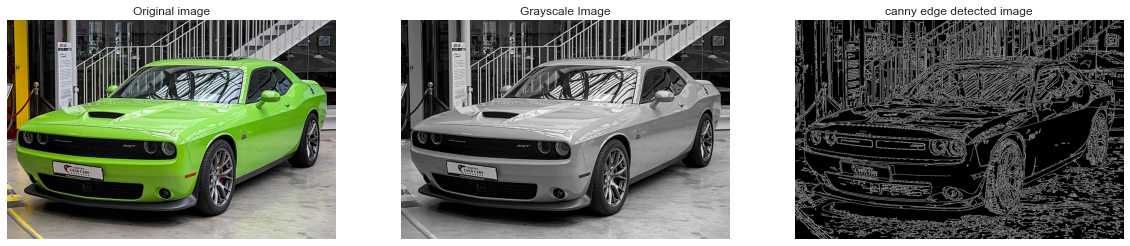

In [1]:
#Canny edge detection
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

loaded_image=cv2.imread("car3.jpg")
loaded_image=cv2.cvtColor(loaded_image,cv2.COLOR_BGR2RGB)

gray_image=cv2.cvtColor(loaded_image,cv2.COLOR_BGR2GRAY)

edged_image=cv2.Canny(gray_image,threshold1=30,threshold2=100)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(loaded_image,cmap="gray")
plt.title("Original image")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(gray_image,cmap="gray")
plt.axis("off")
plt.title("Grayscale Image")
plt.subplot(1,3,3)
plt.imshow(edged_image,cmap="gray")
plt.axis("off")
plt.title("canny edge detected image")
plt.show()

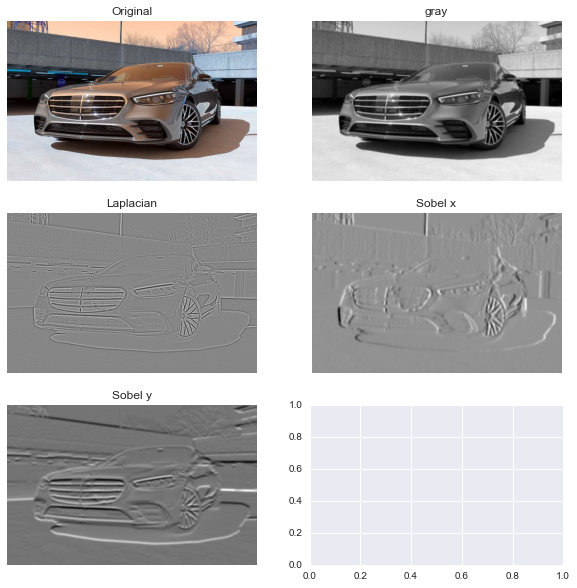

In [2]:
#Edge detection schemes-the gradient (Sobel-first order derivatives) based edge detector and the Laplacian (2nd order derivatives,so it is extremly sensitive to noise)based edge detector

#Laplacian and Sobel Edge detecting methds
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Loading image
img1=cv2.imread("car2.jpg")

#Converting to gray scale
gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

#remove noise
img2=cv2.GaussianBlur(gray,(3,3),0)

#convolate with proper kernals
laplacian=cv2.Laplacian(img2,cv2.CV_64F)
sobelx=cv2.Sobel(img2,cv2.CV_64F,1,0,ksize=11)
sobely=cv2.Sobel(img2,cv2.CV_64F,0,1,ksize=11)

fig, ax = plt.subplots(3, 2, figsize=(10,10))

plt.subplot(3,2,1),plt.imshow(img1)
plt.title("Original"),plt.xticks([]),plt.yticks([])
plt.subplot(3,2,2),plt.imshow(img2,cmap="gray")
plt.title("gray"),plt.xticks([]),plt.yticks([])
plt.subplot(3,2,3),plt.imshow(laplacian,cmap="gray")
plt.title("Laplacian"),plt.xticks([]),plt.yticks([])
plt.subplot(3,2,4),plt.imshow(sobelx,cmap="gray")
plt.title("Sobel x"),plt.xticks([]),plt.yticks([])
plt.subplot(3,2,5),plt.imshow(sobely,cmap="gray")
plt.title("Sobel y"),plt.xticks([]),plt.yticks([])

plt.show()

In [ ]:
# Edge detection using Prewitt operator
import cv2
import numpy as np
from matplotlib import pyplot as plt
img=cv2.imread("bird2.png")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gaussian=cv2.GaussianBlur(gray,(3,3),0)

#prewitt
kernelx=np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely=np.array([[-1,0,1],[-1,0,0],[-1,-1,-1]])
img_prewittx=cv2.filter2D(img_gaussian,-1,kernelx)
img_prewitty=cv2.filter2D(img_gaussian,-1,kernely)

cv2.imshow("Original image",img)
cv2.imshow("Prewitt x",img_prewittx)
cv2.imshow("Prewitt y",img_prewitty)
cv2.imshow("Prewitt",img_prewittx + img_prewitty)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
#Roberts Edge Detection-Roberts cross operator
import cv2
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
roberts_cross_v=np.array([[1,0],
                        [0,-1]])

roberts_cross_h=np.array([[0,1],
                         [-1,0]])

img=cv2.imread("car1.jpg",0).astype('float64')
img/=255.0
vertical=ndimage.convolve(img,roberts_cross_v)
horizontal=ndimage.convolve(img,roberts_cross_h)

edged_img=np.sqrt(np.square(horizontal)+np.square(vertical))
edged_img*=255
#cv2.imwrite("Output.jpg",edged_img)
cv2.imshow("OutputImage",edged_img)
cv2.waitKey()
cv2.destroyAllWindows()